In [1]:
import pandas as pd
from pathlib import Path
DATASET_FOLDER = "/kaggle/input/exoplanetdataset"  
# Replace with your actual filename
RAW_PATH = Path(DATASET_FOLDER)/"Dataset_40.csv"
RAW_PATH

PosixPath('/kaggle/input/exoplanetdataset/Dataset_40.csv')

In [2]:
#load the dataset(exact filename discovered)
import pandas as pd
from pathlib import Path
RAW_PATH = Path("/kaggle/input/dataset-40-csv/Dataset_40.csv.csv")
print("Raw path exists?:", RAW_PATH.exists())
print("Raw path:", RAW_PATH)
# try loading(skip NASA comment lines)
df = pd.read_csv(RAW_PATH, comment='#', low_memory=False)
print("Loaded shape:", df.shape)
df.head(5)

Raw path exists?: True
Raw path: /kaggle/input/dataset-40-csv/Dataset_40.csv.csv
Loaded shape: (39119, 42)


,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,pl_controv_flag,...,ra,decstr,dec,sy_dist,sy_vmag,sy_kmag,sy_gaiamag,rowupdate,pl_pubdate,releasedate
0,11 Com b,11 Com,1,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,0,...,185.178779,+17d47m35.71s,17.793252,93.1846,4.72307,2.282,4.44038,2023-09-19,2023-08,2023-09-19
1,11 Com b,11 Com,0,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,0,...,185.178779,+17d47m35.71s,17.793252,93.1846,4.72307,2.282,4.44038,2014-05-14,2008-01,2014-05-14
2,11 Com b,11 Com,0,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,0,...,185.178779,+17d47m35.71s,17.793252,93.1846,4.72307,2.282,4.44038,2014-07-23,2011-08,2014-07-23
3,11 UMi b,11 UMi,0,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,Published Confirmed,0,...,229.274595,+71d49m26.19s,71.823943,125.3210,5.01300,1.939,4.56216,2018-04-25,2009-10,2014-05-14
4,11 UMi b,11 UMi,1,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,Published Confirmed,0,...,229.274595,+71d49m26.19s,71.823943,125.3210,5.01300,1.939,4.56216,2018-09-04,2017-03,2018-09-06


In [3]:
print("Rows,Cols:", df.shape)
print("\nFirst 40 column names:")
for i, c in enumerate(list(df.columns)[:40], 1):
    print(f"{i:02d}. {c}")
print("\nData types & non-null counts:")
df.info(verbose=True, show_counts=True)

Rows,Cols: (39119, 42)

First 40 column names:
01. pl_name
02. hostname
03. default_flag
04. sy_snum
05. sy_pnum
06. discoverymethod
07. disc_year
08. disc_facility
09. soltype
10. pl_controv_flag
11. pl_refname
12. pl_orbper
13. pl_orbsmax
14. pl_rade
15. pl_radj
16. pl_bmasse
17. pl_bmassj
18. pl_bmassprov
19. pl_orbeccen
20. pl_insol
21. pl_eqt
22. ttv_flag
23. st_refname
24. st_spectype
25. st_teff
26. st_rad
27. st_mass
28. st_met
29. st_metratio
30. st_logg
31. sy_refname
32. rastr
33. ra
34. decstr
35. dec
36. sy_dist
37. sy_vmag
38. sy_kmag
39. sy_gaiamag
40. rowupdate

Data types & non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39119 entries, 0 to 39118
Data columns (total 42 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pl_name          39119 non-null  object 
 1   hostname         39119 non-null  object 
 2   default_flag     39119 non-null  int64  
 3   sy_snum          39119 non-null  int64  


In [4]:
required = {
 'pl_rade':'planet radius (Earth radii)',
 'pl_bmasse':'planet mass (Earth masses)',
 'pl_dens':'planet density',
 'pl_eqt':'equilibrium temperature (K)',
 'pl_orbper':'orbital period (days)',
 'pl_orbsmax':'semi-major axis (AU)',
 'st_spectype':'host star spectral type',
 'st_lum':'star luminosity',
 'st_teff':'star effective temperature (K)',
 'st_metfe':'star metallicity (Fe/H)',
 'sy_dist':'system distance (pc)'
}
print("Required columns present? (True means present)\n")
for k,v in required.items():
    print(f"{k:12}->{k in df.columns}")
print("\nTop 15 columns by missing count:")
missing = df.isnull().sum().sort_values(ascending=False)
print(missing.head(15))

Required columns present? (True means present)

pl_rade     ->True
pl_bmasse   ->True
pl_dens     ->False
pl_eqt      ->True
pl_orbper   ->True
pl_orbsmax  ->True
st_spectype ->True
st_lum      ->False
st_teff     ->True
st_metfe    ->False
sy_dist     ->True

Top 15 columns by missing count:
st_spectype     36261
pl_bmassj       32099
pl_bmasse       32098
pl_bmassprov    32098
pl_insol        22010
pl_eqt          21979
pl_orbeccen     20418
pl_orbsmax      17203
st_metratio     14565
st_met          14368
pl_radj         12140
pl_rade         12140
st_logg          8715
st_mass          6056
st_teff          3451
dtype: int64


In [5]:
df_clean = df.copy()
#Strip whitespace from column names
df_clean.columns = [c.strip() for c in df_clean.columns]
#Drop fully empty rows
df_clean = df_clean.dropna(how="all")
#Drop exact duplicate rows
df_clean = df_clean.drop_duplicates()
#If multiple parameter sets exist for same planet, keep most recent
if "pl_name" in df_clean.columns and "rowupdate" in df_clean.columns:
    df_clean = df_clean.sort_values("rowupdate").drop_duplicates(subset=["pl_name"], keep="last")
#Create a consistent rename map for key features
rename_map = {
    "pl_rade": "planet_radius_re",
    "pl_bmasse": "planet_mass_me",
    "pl_eqt": "planet_eq_temp_k",
    "pl_orbper": "orbital_period_days",
    "pl_orbsmax": "semi_major_axis_au",
    "st_teff": "star_temp_k",
    "st_met": "star_metallicity",
    "sy_dist": "system_distance_pc"
}
df_clean = df_clean.rename(columns=rename_map)
#Save cleaned dataset (for download)
clean_path = "/kaggle/working/exoplanets_cleaned.csv"
df_clean.to_csv(clean_path, index=False)

print("Cleaned dataset saved:", clean_path)
print("Final cleaned shape:", df_clean.shape)
df_clean.head()


Cleaned dataset saved: /kaggle/working/exoplanets_cleaned.csv
Final cleaned shape: (6052, 42)


,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,pl_controv_flag,...,ra,decstr,dec,system_distance_pc,sy_vmag,sy_kmag,sy_gaiamag,rowupdate,pl_pubdate,releasedate
3122,HD 233604 b,HD 233604,1,1,1,Radial Velocity,2013,McDonald Observatory,Published Confirmed,0,...,137.453505,+53d34m05.53s,53.568202,847.0580,10.29100,7.979,10.10540,2014-05-14,2013-06,2014-05-14
920,GU Psc b,GU Psc,1,1,1,Imaging,2014,Gemini Observatory,Published Confirmed,0,...,18.146485,+17d03m54.01s,17.065003,47.5501,14.14600,9.345,12.96560,2014-05-14,2014-05,2014-05-14
25868,Kepler-38 b,Kepler-38,1,2,1,Transit,2012,Kepler,Published Confirmed,0,...,286.830312,+42d16m44.92s,42.279143,1174.5900,14.01500,12.342,13.90660,2014-05-14,2012-10,2014-05-14
2916,HD 208527 b,HD 208527,1,1,1,Radial Velocity,2012,Bohyunsan Optical Astronomical Observatory,Published Confirmed,0,...,329.099941,+21d14m23.72s,21.239922,312.2020,6.38984,2.224,5.61607,2014-05-14,2013-01,2014-05-14
257,CT Cha b,CT Cha,1,1,1,Imaging,2007,Paranal Observatory,Published Confirmed,0,...,166.037504,-76d27m19.33s,-76.455369,190.7200,12.33500,8.661,11.77330,2014-05-14,2008-11,2014-05-14


In [6]:
data_dict_df = pd.DataFrame({
    "column_name": df_clean.columns,
    "description": [""] * len(df_clean.columns)
})
data_dict_df.to_csv("/kaggle/working/data_dictionary.csv", index=False)
print("Saved data_dictionary.csv")

Saved data_dictionary.csv


In [7]:
missing_after = df_clean.isnull().sum().sort_values(ascending=False)
with open("/kaggle/working/validation_report.txt", "w") as f:
    f.write("Original shape: " + str(df.shape) + "\n")
    f.write("Cleaned shape: " + str(df_clean.shape) + "\n\n")
    f.write("Missing values (top 20):\n")
    f.write(str(missing_after.head(20)))
print("Saved validation_report.txt")

Saved validation_report.txt


Missing values in important columns:

planet_radius_re       2845
planet_mass_me         3948
planet_eq_temp_k       4689
orbital_period_days     379
semi_major_axis_au     2883
star_temp_k            1112
star_metallicity       2587
system_distance_pc      160
dtype: int64


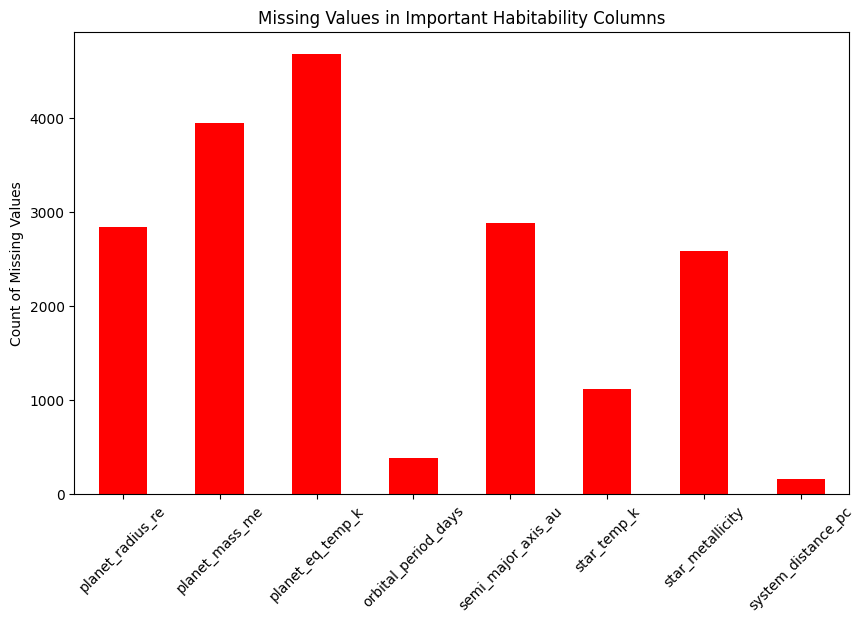

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


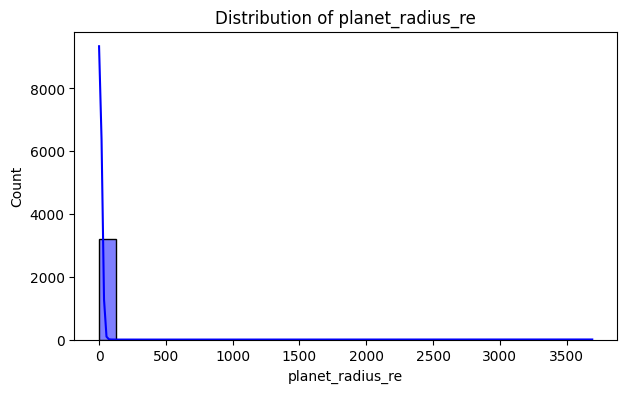

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


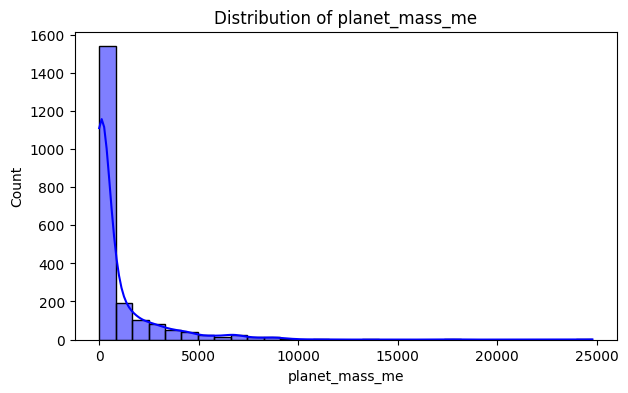

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


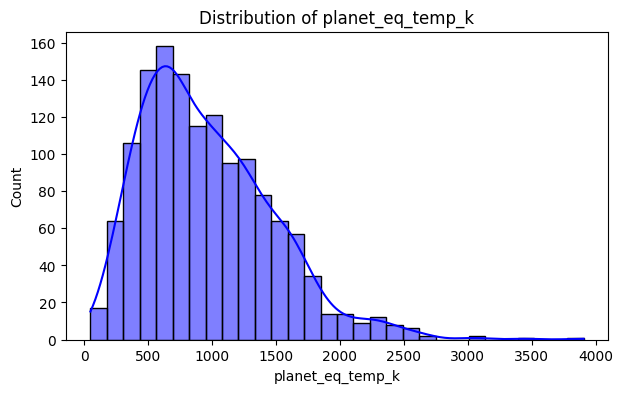

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


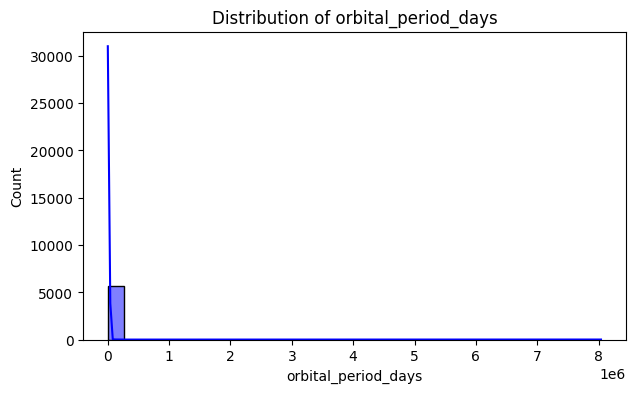

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


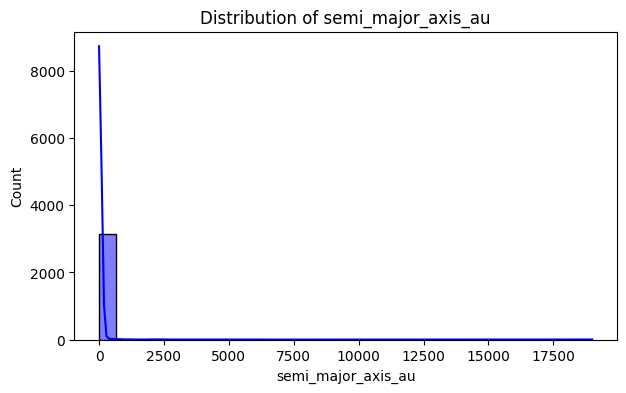

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


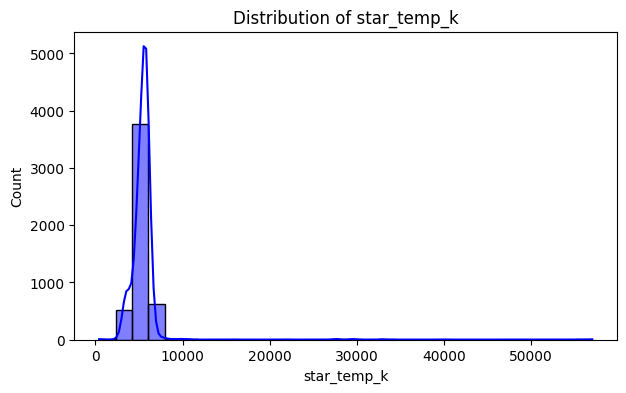

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


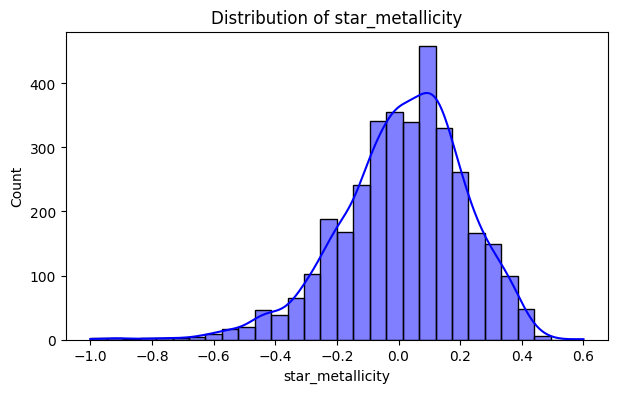

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


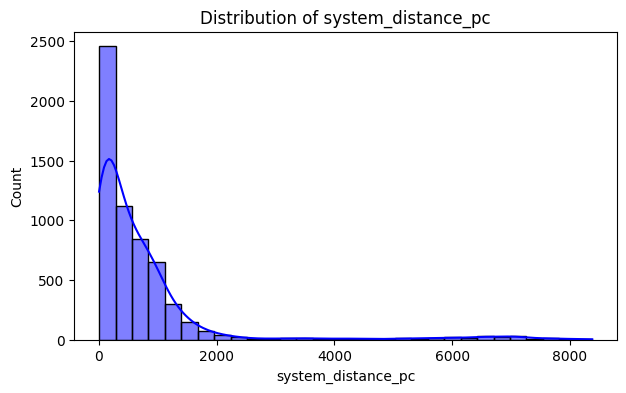

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/kaggle/working/exoplanets_cleaned.csv")
#EDA
important_cols = [
    'planet_radius_re',
    'planet_mass_me',
    'planet_eq_temp_k',
    'orbital_period_days',
    'semi_major_axis_au',
    'star_temp_k',
    'star_metallicity',
    'system_distance_pc'
]
#Show missing values for important columns
print("Missing values in important columns:\n")
print(df[important_cols].isnull().sum())

plt.figure(figsize=(10,6))
df[important_cols].isnull().sum().plot(kind='bar', color='red')
plt.title("Missing Values in Important Habitability Columns")
plt.ylabel("Count of Missing Values")
plt.xticks(rotation=45)
plt.show()

#seperate columns.
for col in important_cols:
    plt.figure(figsize=(7,4))
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

In [9]:
import numpy as np
df_imp=df_clean.copy()

#impute using the median imputation
df_imp['orbital_period_days']= df_imp['orbital_period_days'].fillna(df_imp['orbital_period_days'].median())
df_imp['system_distance_pc']=df_imp['system_distance_pc'].fillna(df_imp['system_distance_pc'].median())
df_imp['star_temp_k']=df_imp['star_temp_k'].fillna(df_imp['star_temp_k'].median())
df_imp['planet_radius_re']=df_imp['planet_radius_re'].fillna(df_imp['planet_radius_re'].median())
df_imp['star_metallicity']=df_imp['star_metallicity'].fillna(df_imp['star_metallicity'].median())
df_imp['semi_major_axis_au']=df_imp['semi_major_axis_au'].fillna(df_imp['semi_major_axis_au'].median())


print("median imputation in missing cloumns.")
print(df_imp[important_cols].isnull().sum())

median imputation in missing cloumns.
planet_radius_re          0
planet_mass_me         3948
planet_eq_temp_k       4689
orbital_period_days       0
semi_major_axis_au        0
star_temp_k               0
star_metallicity          0
system_distance_pc        0
dtype: int64


In [10]:
# finding planet radius using formula
df_imp['planet_eq_temp_calc']=np.nan
if 'st_rad' in df_imp.columns:
    df_imp['planet_eq_temp_calc']=df_imp['star_temp_k']*np.sqrt(df_imp['st_rad']/(2*df_imp['semi_major_axis_au']))

print("Missing old eq_temp:",df_imp['planet_eq_temp_k'].isnull().sum())
print("Missing new eq_temp:",df_imp['planet_eq_temp_calc'].isnull().sum())
df_imp['planet_eq_temp_calc']=df_imp['planet_eq_temp_calc'].fillna(df_imp['planet_eq_temp_calc'].median())
print("missing values in planet_temp:", 
df_imp['planet_eq_temp_calc'].isnull().sum())

df_imp['mass_available']=df_imp['planet_mass_me'].notnull().astype(int)
print(df_imp['mass_available'].value_counts())
df_imp['planet_mass_me']=df_imp['planet_mass_me'].fillna(df_imp['planet_mass_me'].median())
print("mass after filling:",df_imp['planet_mass_me'].isnull().sum())

Missing old eq_temp: 4689
Missing new eq_temp: 1107
missing values in planet_temp: 0
mass_available
0    3948
1    2104
Name: count, dtype: int64
mass after filling: 0


In [11]:
#habitability score
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

scaler=MinMaxScaler()
score_features=[
    'planet_eq_temp_calc','planet_radius_re','semi_major_axis_au','star_temp_k'
]
scaled_values=scaler.fit_transform(df_imp[score_features])
scaled_df=pd.DataFrame(
    scaled_values,columns=[f"{c}_scaled" for c in score_features]
)
df_score=pd.concat([df_imp.reset_index(drop=True),scaled_df],axis=1)
df_score['habitability_score']=(
    0.4*df_score['planet_eq_temp_calc_scaled']+
    0.25*df_score['planet_radius_re_scaled']+
    0.2*df_score['semi_major_axis_au_scaled']+
    0.15*df_score['star_temp_k_scaled']
)
print(df_score['habitability_score'].describe())

count    6052.000000
mean        0.051669
std         0.020779
min         0.001199
25%         0.041271
50%         0.048981
75%         0.058214
max         0.472442
Name: habitability_score, dtype: float64


In [12]:
#stellar compatibility
from sklearn.preprocessing import MinMaxScaler
star_scaler = MinMaxScaler()
star_features=[
    'star_metallicity','system_distance_pc'
]
scaled_star=star_scaler.fit_transform(df_score[star_features])
star_scaled_df=pd.DataFrame(scaled_star,columns=[f"{c}_scaled" for c in star_features])
df_score=pd.concat([df_score.reset_index(drop=True),star_scaled_df],axis=1)
df_score['stellar_compatibility_index']=(0.5*df_score['star_temp_k_scaled']+0.3*df_score['star_metallicity_scaled']+0.2*df_score['system_distance_pc_scaled'])
print(df_score['stellar_compatibility_index'].describe())

count    6052.000000
mean        0.252665
std         0.043907
min         0.048390
25%         0.234484
50%         0.247567
75%         0.270139
max         0.705407
Name: stellar_compatibility_index, dtype: float64


In [13]:
#one hot encoding
import pandas as pd
categorical_cols=['st_spectype','discoverymethod']
df_encoded=pd.get_dummies(
df_score,columns=categorical_cols,drop_first=True)
print("original shape:",df_score.shape)
print("after encoding shape:",df_encoded.shape)

original shape: (6052, 52)
after encoding shape: (6052, 264)


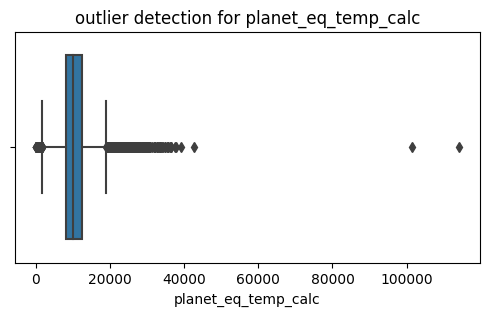

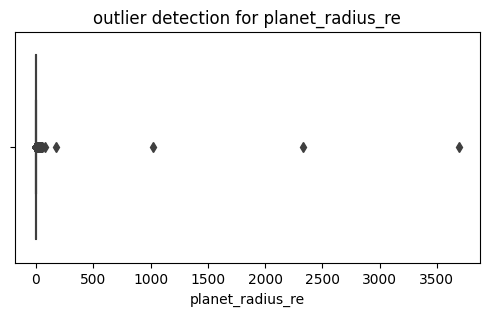

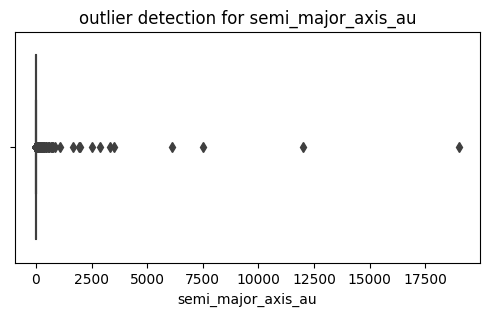

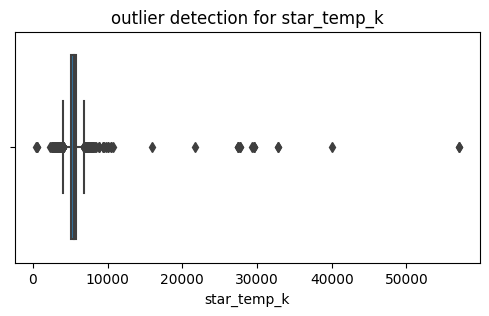

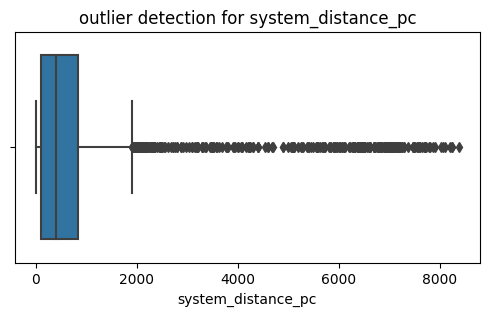

In [14]:
#outliers
import matplotlib.pyplot as plt
import seaborn as sns
outliers_cols=['planet_eq_temp_calc','planet_radius_re','semi_major_axis_au','star_temp_k','system_distance_pc']
for col in outliers_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df_encoded[col])
    plt.title(f"outlier detection for {col}")
    plt.show()

In [15]:
#dependent and independent variables
df_encoded['habitable_label']=(df_encoded['habitability_score']>=0.3).astype(int)
print("habitable label distribution:")
print(df_encoded['habitable_label'].value_counts())
X=df_encoded.drop(columns=['habitability_score','habitable_label']) #ID
y=df_encoded['habitable_label']#D
print("Shape of x:", X.shape)
print("Shape of y:", y.shape)
print("Missing values in x:", X.isnull().sum().sum())
print("Missing values in y:", y.isnull().sum())

X=X.fillna(0)
print("missing values in x after fix:",X.isnull().sum().sum())



habitable label distribution:
habitable_label
0    6050
1       2
Name: count, dtype: int64
Shape of x: (6052, 263)
Shape of y: (6052,)
Missing values in x: 32560
Missing values in y: 0
missing values in x after fix: 0


In [16]:
# Keep only numeric columns for ML
X = X.select_dtypes(include=['number'])
print("X shape after keeping only numeric columns:", X.shape)
print("Any remaining strings?:", X.dtypes[X.dtypes == 'object'])


X shape after keeping only numeric columns: (6052, 35)
Any remaining strings?: Series([], dtype: object)


In [17]:
#dataset 80/20 spliting
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

print("training set shape: ",X_train.shape,y_train.shape)
print("testing set shape: ",X_test.shape,y_test.shape)

#baseline logistic regression model
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    random_state=42
)
#model training
log_reg.fit(X_train, y_train)
#predict class label
y_pred=log_reg.predict(X_test)
#predict probability
y_prob=log_reg.predict_proba(X_test)[:,1]
from sklearn.metrics import classification_report, confusion_matrix

print("Classification report: ",classification_report(y_test,y_pred))
print("confusion matrix: ",confusion_matrix(y_test,y_pred))

training set shape:  (4841, 35) (4841,)
testing set shape:  (1211, 35) (1211,)
Classification report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00      1211

    accuracy                           1.00      1211
   macro avg       1.00      1.00      1.00      1211
weighted avg       1.00      1.00      1.00      1211

confusion matrix:  [[1211]]


In [18]:
#random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

rf_model=RandomForestClassifier(n_estimators=100,max_depth=5,random_state=42,class_weight='balanced')
#training the model
rf_model.fit(X_train,y_train)
#testing
y_pred_rf=rf_model.predict(X_test)
y_prob_rf=rf_model.predict_proba(X_test)[:,1]
print("RF classification report:",classification_report(y_test,y_pred_rf))
print("RF confusion matrix:",confusion_matrix(y_test,y_pred_rf))


RF classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1211

    accuracy                           1.00      1211
   macro avg       1.00      1.00      1.00      1211
weighted avg       1.00      1.00      1.00      1211

RF confusion matrix: [[1211]]


In [19]:
#cross validation with random forest
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import(
accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
)
import numpy as np
skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
acc_scores = []
prec_scores = []
rec_scores = []
f1_scores = []
roc_scores = []
#cross validation loop
for train_idx,test_idx in skf.split(X,y):
    X_train_cv,X_test_cv=X.iloc[train_idx],X.iloc[test_idx]
    y_train_cv,y_test_cv=y.iloc[train_idx],y.iloc[test_idx]

rf_model=RandomForestClassifier(n_estimators=100,max_depth=5,random_state=42,class_weight='balanced')
#model training
rf_model.fit(X_train_cv,y_train_cv)
y_pred_cv=rf_model.predict(X_test_cv)
y_prob_cv=rf_model.predict_proba(X_test_cv)[:, 1]

acc_scores.append(accuracy_score(y_test_cv, y_pred_cv))
prec_scores.append(precision_score(y_test_cv, y_pred_cv, zero_division=0))
rec_scores.append(recall_score(y_test_cv, y_pred_cv, zero_division=0))
f1_scores.append(f1_score(y_test_cv, y_pred_cv, zero_division=0))

if len (np.unique(y_test_cv))>1:
    roc_scores.append(roc_auc_scores(y_test_cv,y_prob_cv))

print("average accuracy:",np.mean(acc_scores))
print("average precision:",np.mean(prec_scores))
print("average recall:",np.mean(rec_scores))
print("average f1-scores:",np.mean(f1_scores))

if len(roc_scores)>0:
    print("average roc-auc:",np.mean(roc_scores))
else:
    print("roc-auc could not be computed reliably")

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


average accuracy: 1.0
average precision: 0.0
average recall: 0.0
average f1-scores: 0.0
roc-auc could not be computed reliably


In [20]:
#Random forest regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

X_reg = df_score.drop(
    columns=[
        'habitability_score',
        'habitable_label',
        'habitability_level',
        'habitability_level_v2'
    ],
    errors='ignore'
)

X_reg = X_reg.select_dtypes(include=['number']).fillna(0)
y_reg = df_score['habitability_score']
rf_reg = RandomForestRegressor(
    n_estimators=200,
    max_depth=8,
    random_state=42
)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scoring = {
    'mae': 'neg_mean_absolute_error',
    'rmse': 'neg_root_mean_squared_error',
    'r2': 'r2'
}
cv_results = cross_validate(
    rf_reg,
    X_reg,
    y_reg,
    cv=kf,
    scoring=scoring
)
print("Mean MAE:", -np.mean(cv_results['test_mae']))
print("Mean RMSE:", -np.mean(cv_results['test_rmse']))
print("Mean R2 Score:", np.mean(cv_results['test_r2']))


Mean MAE: 0.0010044141487958638
Mean RMSE: 0.005264327211185755
Mean R2 Score: 0.9109632931739741


In [21]:
#XG booster
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np

def habitability_level_v2(score):
    if score < 0.45:
        return 0
    elif score < 0.60:
        return 1
    else:
        return 2

df_score['habitability_level_v2'] = df_score['habitability_score'].apply(habitability_level_v2)

print("Class distribution:")
print(df_score['habitability_level_v2'].value_counts())

X_multi = df_score.drop(
    columns=[
        'habitability_score',
        'habitable_label',
        'habitability_level',
        'habitability_level_v2'
    ],
    errors='ignore'
)

X_multi = X_multi.select_dtypes(include=['number']).fillna(0)
y_multi = df_score['habitability_level_v2']

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
    X_multi,
    y_multi,
    test_size=0.2,
    random_state=42,
    shuffle=True
)

xgb_model = XGBClassifier(
    objective='multi:softprob',
    num_class=3,
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='mlogloss',
    random_state=42
)

xgb_model.fit(X_train_m, y_train_m)

y_pred_xgb = xgb_model.predict(X_test_m)

print("\nXGBoost Multi-class Classification Report:")
print(classification_report(y_test_m, y_pred_xgb, zero_division=0))

print("Confusion Matrix:")
print(confusion_matrix(y_test_m, y_pred_xgb))


Class distribution:
habitability_level_v2
0    6051
1       1
Name: count, dtype: int64

XGBoost Multi-class Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1210
           1       0.00      0.00      0.00         1

    accuracy                           1.00      1211
   macro avg       0.50      0.50      0.50      1211
weighted avg       1.00      1.00      1.00      1211

Confusion Matrix:
[[1210    0]
 [   1    0]]


In [22]:
#ranking planets based on habitability score
top_10_planets=df_score.sort_values(
    by='habitability_score',ascending=False
)[['pl_name','hostname','habitability_score']].head(10)
print(top_10_planets)

                 pl_name          hostname  habitability_score
8               KOI-55 b            KOI-55            0.472442
23              KOI-55 c            KOI-55            0.427841
4373        Kepler-230 b        Kepler-230            0.289364
3343  UCAC4 328-061594 b  UCAC4 328-061594            0.248965
4151         Kepler-29 b         Kepler-29            0.209811
62              NN Ser c            NN Ser            0.185462
65              NN Ser d            NN Ser            0.185442
3345            GJ 900 b          GJ 900 A            0.175281
1559            NY Vir b            NY Vir            0.165144
1558            NY Vir c            NY Vir            0.165144


In [23]:
#decision tree classifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

#Quantile-based forced labels (already proven working)
threshold = df_score['habitability_score'].quantile(0.5)
df_score['habitable_label_forced'] = (
    df_score['habitability_score'] >= threshold
).astype(int)
print("Forced label distribution:")
print(df_score['habitable_label_forced'].value_counts())
#Prepare features
X_forced = df_score.drop(
    columns=[
        'habitability_score',
        'habitable_label',
        'habitability_level',
        'habitability_level_v2',
        'habitable_label_forced'
    ],
    errors='ignore'
)
X_forced = X_forced.select_dtypes(include=['number']).fillna(0)
y_forced = df_score['habitable_label_forced']

#ADD NOISE(this breaks strong patterns)
noise = np.random.normal(0, 0.5, X_forced.shape)
X_noisy = X_forced + noise
#Train-test split
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(
    X_noisy,
    y_forced,
    test_size=0.2,
    random_state=42,
    shuffle=True
)
w_model = DecisionTreeClassifier(
    max_depth=2,
    random_state=42
)
w_model.fit(X_train_f, y_train_f)
y_pred_f = w_model.predict(X_test_f)
print("Accuracy:", accuracy_score(y_test_f, y_pred_f))
print(classification_report(y_test_f, y_pred_f))
print(confusion_matrix(y_test_f, y_pred_f))


Forced label distribution:
habitable_label_forced
1    3026
0    3026
Name: count, dtype: int64
Accuracy: 0.8868703550784476
              precision    recall  f1-score   support

           0       0.83      0.98      0.90       610
           1       0.98      0.79      0.87       601

    accuracy                           0.89      1211
   macro avg       0.90      0.89      0.89      1211
weighted avg       0.90      0.89      0.89      1211

[[600  10]
 [127 474]]


In [24]:
import joblib
import json

joblib.dump(log_reg, "logistic_model.pkl")
joblib.dump(rf_model, "rf_classifier.pkl")
joblib.dump(rf_reg, "rf_regressor.pkl")
joblib.dump(xgb_model, "xgb_multiclass.pkl")
joblib.dump(w_model, "decision_tree.pkl")

# Feature lists
with open("features_classification.json", "w") as f:
    json.dump(list(X.columns), f)

with open("features_score.json", "w") as f:
    json.dump(list(X_reg.columns), f)

print("All models + feature files saved successfully")


All models + feature files saved successfully
